In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.pylabtools import figsize

%matplotlib inline

## To check if the toolbox is working properly, classic Cart-Pole problem is considered.
## RL agent is trained to balance a pole on a cart as long as possible.

In [11]:
figsize(9,6)

def print_exec_time_summary(df_ep_ls, df_ex_ts):
    n_steps_in_exp = df_ep_ls.sum(axis=0).values
    t_per_step = df_ex_ts[0].values / n_steps_in_exp
    tot_ex_t = df_ex_ts.values.sum()
    tot_n_steps = n_steps_in_exp.sum()
    avg_per_step = tot_ex_t / tot_n_steps
    print("Time per simulation step in each experiment: {} s".format(t_per_step))
    print("Mean time per simulation step: {:.3f} s, std: {:.3f} s".format(t_per_step.mean(), t_per_step.std()))
    print("Total execution time: {:.3f} s for {} steps -> {:.3f} s per step". format(tot_ex_t, tot_n_steps, avg_per_step))
    
def plot_ep_lens(df, title_spec, n_runs=5):
    transformed = df.rolling(window=20, min_periods=20, axis=0).mean()[19:]
    transformed['avg'] = transformed.mean(axis=1)
    plt.plot(transformed.index, transformed[list(range(n_runs))], 'gray', 
             alpha=0.5)
    plt.plot(transformed.index, transformed['avg'], 'red', label="Average episode length")
    plt.title("Episodes lenghts vs training time. {}".format(title_spec))
    plt.xlabel("# of episode")
    plt.ylabel("Episode length")
    plt.legend()
    print("Last episode performance: {:.2f}".format(transformed['avg'].iloc[-1]))
    return transformed['avg']

# 1. Various force magnitude experiment
To investigate system behaviour 3 values of force magnitude were considered:
* `small` - force magnitude is significantly smaller than mass of a cart. 5 N
* `moderate` - force magnitude is slightly bigger than mass of a cart. 11 N
* `big` - force magnitude is significantly bigger than mass of a cart. 17 N

For each value 5 experiments with the following parameter were done:
* n_episodes = 100 - number of episodes to perform in each experiment run.
* force - magnitude to be applied during experiment at each time step.
* m_trolley = 10 - mass of a cart.
* m_load = 1 - mass of a pole.
* phi1_start = 85 degrees in rad - angle of the pole relative to positive X-axis direction at experiment start.
* w1_start = 0 - angle speed of the poles mass center.
* time_step = 0.05 s - time difference between simulation steps.
* positive_reward = 1 - positive reward for RL agent.
* negative_reward = -100 - negative reward for RL agent.

Episodes lengths of each training step of each experiment was saved, as well as real execution time for each experiment.

In [2]:
figsize(9,6)

In [3]:
df_small_f_ep_ls = pd.read_csv("./experiment_5_100_10_1_85_0_0.05_1_-100_5_episodes_lengths.csv", header=None)
df_small_f_ex_ts = pd.read_csv("./experiment_5_100_10_1_85_0_0.05_1_-100_5_exec_times.csv", header=None)
df_medium_f_ep_ls = pd.read_csv("./experiment_5_100_10_1_85_0_0.05_1_-100_11_episodes_lengths.csv", header=None)
df_medium_f_ex_ts = pd.read_csv("./experiment_5_100_10_1_85_0_0.05_1_-100_11_exec_times.csv", header=None)
df_big_f_ep_ls = pd.read_csv("./experiment_5_100_10_1_85_0_0.05_1_-100_17_episodes_lengths.csv", header=None)
df_big_f_ex_ts = pd.read_csv("./experiment_5_100_10_1_85_0_0.05_1_-100_17_exec_times.csv", header=None)

### Let's take a look at each experiment.
### To smooth data we will use moving average with window size 20

Last episode performance: 9.43
Time per simulation step in each experiment: [0.11945892 0.11663205 0.11709229 0.11850182 0.11766915] s
Mean time per simulation step: 0.118 s, std: 0.001 s
Total execution time: 547.985 s for 4649 steps -> 0.118 s per step


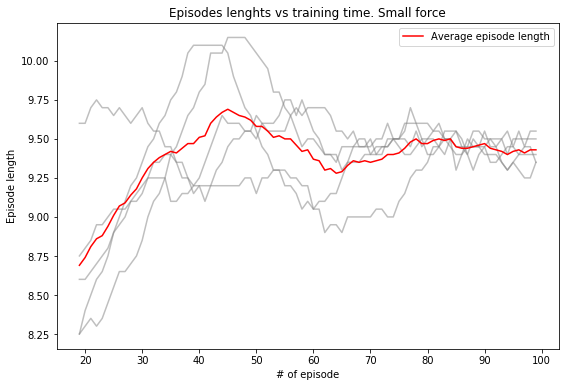

In [4]:
small_force_smoothed = plot_ep_lens(df_small_f_ep_ls, "Small force")
print_exec_time_summary(df_small_f_ep_ls, df_small_f_ex_ts)

Time per simulation step in each experiment: [0.11470015 0.11310535 0.113361   0.11199419 0.11146657] s
Mean time per simulation step: 0.113 s, std: 0.001 s
Total execution time: 951.780 s for 8443 steps -> 0.113 s per step
Last episode performance: 25.64


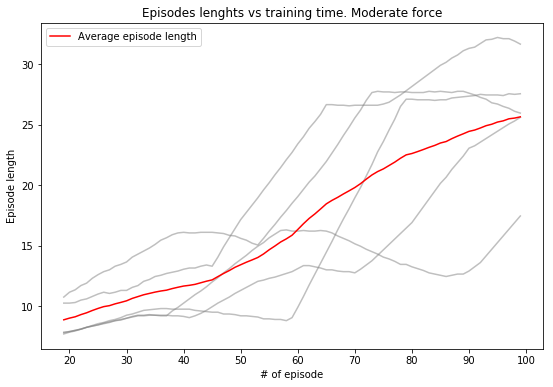

In [5]:
print_exec_time_summary(df_medium_f_ep_ls, df_medium_f_ex_ts)
medium_force_smoothed = plot_ep_lens(df_medium_f_ep_ls, "Moderate force")

Last episode performance: 31.62
Time per simulation step in each experiment: [0.11227927 0.11286873 0.1093424  0.11205407 0.11104163] s
Mean time per simulation step: 0.112 s, std: 0.001 s
Total execution time: 1275.539 s for 11468 steps -> 0.111 s per step


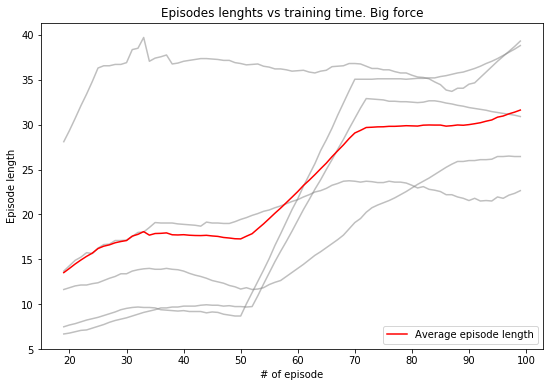

In [6]:
big_force_smoothed = plot_ep_lens(df_big_f_ep_ls, "Big force")
print_exec_time_summary(df_big_f_ep_ls, df_big_f_ex_ts)

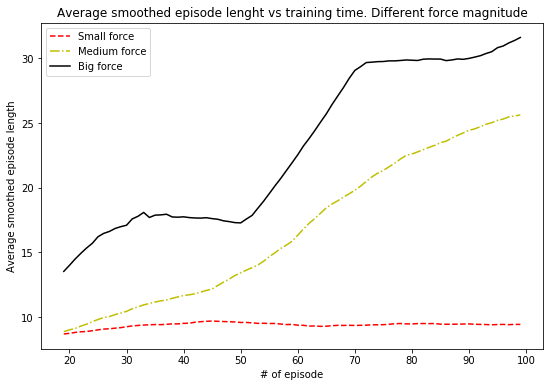

In [7]:
plt.plot(small_force_smoothed, 'r--',label="Small force")
plt.plot(medium_force_smoothed, 'y-.', label="Medium force")
plt.plot(big_force_smoothed, 'k', label="Big force")
plt.title("Average smoothed episode lenght vs training time. Different force magnitude")
plt.xlabel("# of episode")
plt.ylabel("Average smoothed episode length")
plt.legend();

## We observe that episode length (our target variable) growth for moderate and big magnitude of force applied. Moreover, with bigger force magnitude higher value of average episode length can be reached. 
## However, if force is significantly smaller than mass of a cart, agent fails to train. We observe plato in episode length. This is because with such a small magnitude of force, it is is not possible to balance poll with the given constraints. 

## Execution time per simulation step is almost the same in all experiments.

--------------------------------

# 2. Various cart-pole mass ratio experiment
To investigate system behaviour 5 pairs of cart and pole masses were considered [`m_cart`, `m_pole`]:
* [1, 10] - pole mass is significantly bigger than mass of a cart.
* [5, 10] - pole mass is somehow (2 times) bigger than mass of a cart.
* [10, 10] - pole mass is equal to mass of a cart.
*  [10, 5] - pole mass is somehow (2 times) smaller than mass of a cart.
*  [10, 1] - pole mass is significantly smaller than mass of a cart.

For each value 5 experiments with the following parameter were done:
* n_episodes = 200 - number of episodes to perform in each experiment run.
* force = 15 - magnitude to be applied during experiment at each time step.
* m_trolley = `m_cart` - mass of a cart.
* m_load = `m_pole` - mass of a pole.
* phi1_start = 85 degrees in rad - angle of the pole relative to positive X-axis direction at experiment start.
* w1_start = 0 - angle speed of the poles mass center.
* time_step = 0.05 s - time difference between simulation steps.
* positive_reward = 1 - positive reward for RL agent.
* negative_reward = -100 - negative reward for RL agent.

Episodes lengths of each training step of each experiment was saved, as well as real execution time for each experiment.

In [8]:
df_small_mr_ep_ls = pd.read_csv("./experiment_5_200_1_10_85_0_0.05_1_-100_15_episodes_lengths.csv", header=None)
df_small_mr_ex_ts = pd.read_csv("./experiment_5_200_1_10_85_0_0.05_1_-100_15_exec_times.csv", header=None)
df_mod_small_mr_ep_ls = pd.read_csv("./experiment_5_200_5_10_85_0_0.05_1_-100_15_episodes_lengths.csv", header=None)
df_mod_small_mr_ex_ts = pd.read_csv("./experiment_5_200_5_10_85_0_0.05_1_-100_15_exec_times.csv", header=None)
df_equal_mr_ep_ls = pd.read_csv("./experiment_5_200_10_10_85_0_0.05_1_-100_15_episodes_lengths.csv", header=None)
df_equal_mr_ex_ts = pd.read_csv("./experiment_5_200_10_10_85_0_0.05_1_-100_15_exec_times.csv", header=None)
df_mod_big_mr_ep_ls = pd.read_csv("./experiment_5_200_10_5_85_0_0.05_1_-100_15_episodes_lengths.csv", header=None)
df_mod_big_mr_ex_ts = pd.read_csv("./experiment_5_200_10_5_85_0_0.05_1_-100_15_exec_times.csv", header=None)
df_big_mr_ep_ls = pd.read_csv("./experiment_5_200_10_1_85_0_0.05_1_-100_15_episodes_lengths.csv", header=None)
df_big_mr_ex_ts = pd.read_csv("./experiment_5_200_10_1_85_0_0.05_1_-100_15_exec_times.csv", header=None)


### Let's take a look at each experiment.
### To smooth data we will use moving average with window size 20

Last episode performance: 43.98
Time per simulation step in each experiment: [0.11312988 0.10838298 0.11203274 0.11234862 0.10918914] s
Mean time per simulation step: 0.111 s, std: 0.002 s
Total execution time: 2627.882 s for 23786 steps -> 0.110 s per step


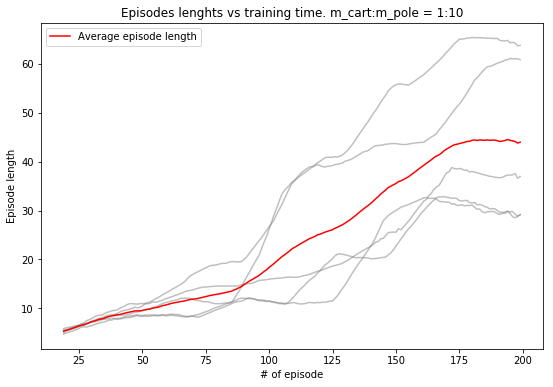

In [9]:
small_mr_smoothed = plot_ep_lens(df_small_mr_ep_ls, "m_cart:m_pole = 1:10")
print_exec_time_summary(df_small_mr_ep_ls, df_small_mr_ex_ts)

Last episode performance: 38.21
Time per simulation step in each experiment: [0.11039036 0.10974896 0.11335728 0.11183923 0.11370564] s
Mean time per simulation step: 0.112 s, std: 0.002 s
Total execution time: 2645.021 s for 23684 steps -> 0.112 s per step


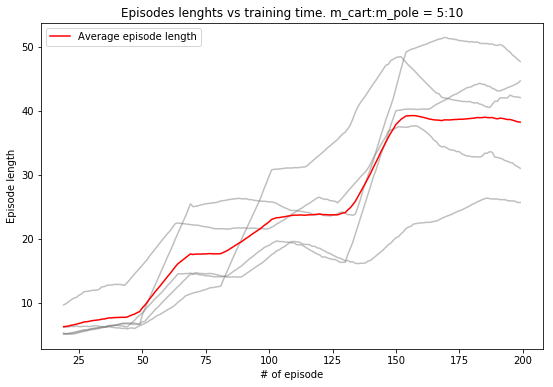

In [10]:
mod_small_mr_smoothed = plot_ep_lens(df_mod_small_mr_ep_ls, "m_cart:m_pole = 5:10")
print_exec_time_summary(df_mod_small_mr_ep_ls, df_mod_small_mr_ex_ts)

Last episode performance: 10.10
Time per simulation step in each experiment: [0.11873848 0.11744246 0.11784989 0.11792156 0.11763478] s
Mean time per simulation step: 0.118 s, std: 0.000 s
Total execution time: 1120.564 s for 9503 steps -> 0.118 s per step


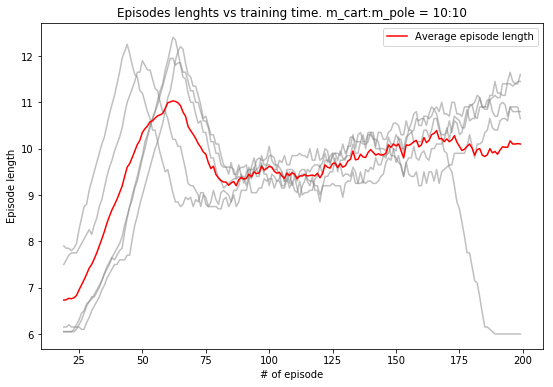

In [11]:
equal_mr_smoothed = plot_ep_lens(df_equal_mr_ep_ls, "m_cart:m_pole = 10:10")
print_exec_time_summary(df_equal_mr_ep_ls, df_equal_mr_ex_ts)

Last episode performance: 41.24
Time per simulation step in each experiment: [0.11082262 0.11338501 0.11200804 0.11259355 0.11170044] s
Mean time per simulation step: 0.112 s, std: 0.001 s
Total execution time: 2638.935 s for 23570 steps -> 0.112 s per step


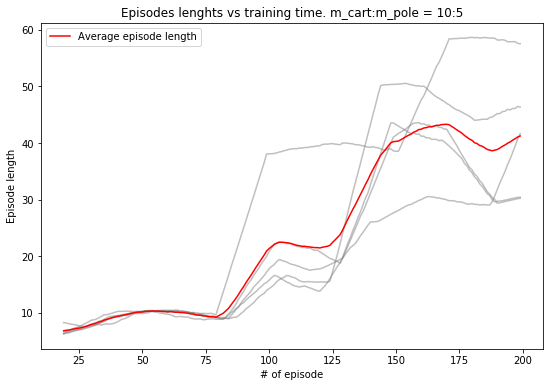

In [12]:
mod_big_mr_smoothed = plot_ep_lens(df_mod_big_mr_ep_ls, "m_cart:m_pole = 10:5")
print_exec_time_summary(df_mod_big_mr_ep_ls, df_mod_big_mr_ex_ts)

Last episode performance: 38.89
Time per simulation step in each experiment: [0.11558802 0.11338792 0.11081102 0.11179343 0.11232459] s
Mean time per simulation step: 0.113 s, std: 0.002 s
Total execution time: 2944.543 s for 26207 steps -> 0.112 s per step


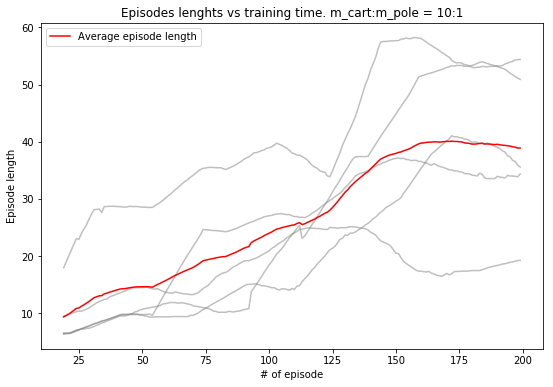

In [13]:
big_mr_smoothed = plot_ep_lens(df_big_mr_ep_ls, "m_cart:m_pole = 10:1")
print_exec_time_summary(df_big_mr_ep_ls, df_big_mr_ex_ts)

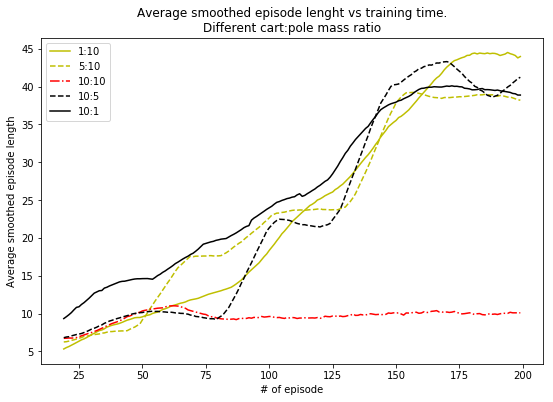

In [14]:
plt.plot(small_mr_smoothed, 'y', label="1:10")
plt.plot(mod_small_mr_smoothed, 'y--', label="5:10")
plt.plot(equal_mr_smoothed, 'r-.', label="10:10")
plt.plot(mod_big_mr_smoothed, 'k--', label="10:5")
plt.plot(big_mr_smoothed, 'k', label="10:1")
plt.title("Average smoothed episode lenght vs training time.\nDifferent cart:pole mass ratio")
plt.xlabel("# of episode")
plt.ylabel("Average smoothed episode length")
plt.legend();

## System behaves as expected. In particular, RL agent's ability to perform the required task is growing with growth of training time. For 4 out of 5 cases agent reached average episode length of ca. 40. This indicates, that despite of what is havier cart or pole, agent is able to perform pretty well.

## Simulation time is almost the same in all experiments, as well as in force magnitude experiments: 0.111 - 0.118 s per step.

## However, interesting phenomena is observed in the experiment #3, where mass of cart and pole are equal. As in case of too small force magnitude, agent is not able to perform well. The reason may be complexity or particularities of such a system with equal masses. In particular, it is very unstable. This may in it's turn somehow slow down simulations.


------------------------------------------

# 3. Various positive-negative reward ratio experiment
To investigate system behaviour 3 pairs of positive - negative rewards were considered [`positive_reward`, `negative_reward`]:
* [1, -200] - negative reward so big, that agent has to balance pole for 200 steps to get non-negative reward
* [1, -100] - negative reward so big, that agent has to balance pole for 100 steps to get non-negative reward
* [1, -50] - negative reward so big, that agent has to balance pole for 50 steps to get non-negative reward

For each value 5 experiments with the following parameter were done:
* n_episodes = 200 - number of episodes to perform in each experiment run.
* force = 15 - magnitude to be applied during experiment at each time step.
* m_trolley = 10 - mass of a cart.
* m_load = 1 - mass of a pole.
* phi1_start = 85 degrees in rad - angle of the pole relative to positive X-axis direction at experiment start.
* w1_start = 0 - angle speed of the poles mass center.
* time_step = 0.05 s - time difference between simulation steps.
* positive_reward = `positive_reward` - positive reward for RL agent.
* negative_reward = `negative_reward` - negative reward for RL agent.

Episodes lengths of each training step of each experiment was saved, as well as real execution time for each experiment.

In [15]:
df_small_rr_ep_ls = pd.read_csv("./experiment_5_200_10_1_85_0_0.05_1_-50_15_episodes_lengths.csv", header=None)
df_small_rr_ex_ts = pd.read_csv("./experiment_5_200_10_1_85_0_0.05_1_-50_15_exec_times.csv", header=None)
df_medium_rr_ep_ls = pd.read_csv("./experiment_5_200_10_1_85_0_0.05_1_-100_15_episodes_lengths.csv", header=None)
df_medium_rr_ex_ts = pd.read_csv("./experiment_5_200_10_1_85_0_0.05_1_-100_15_exec_times.csv", header=None)
df_big_rr_ep_ls = pd.read_csv("./experiment_5_200_10_1_85_0_0.05_1_-200_15_episodes_lengths.csv", header=None)
df_big_rr_ex_ts = pd.read_csv("./experiment_5_200_10_1_85_0_0.05_1_-200_15_exec_times.csv", header=None)

### Let's take a look at each experiment.
### To smooth data we will use moving average with window size 20

Last episode performance: 32.05
Time per simulation step in each experiment: [0.11339066 0.11339325 0.11279591 0.11503914 0.11315443] s
Mean time per simulation step: 0.114 s, std: 0.001 s
Total execution time: 2453.926 s for 21632 steps -> 0.113 s per step


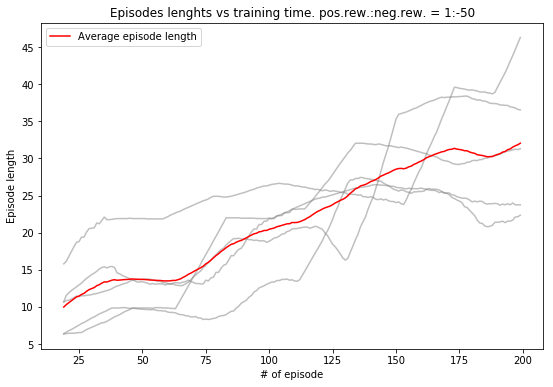

In [16]:
small_rr_smoothed = plot_ep_lens(df_small_rr_ep_ls, "pos.rew.:neg.rew. = 1:-50")
print_exec_time_summary(df_small_rr_ep_ls, df_small_rr_ex_ts)

Last episode performance: 38.89
Time per simulation step in each experiment: [0.11558802 0.11338792 0.11081102 0.11179343 0.11232459] s
Mean time per simulation step: 0.113 s, std: 0.002 s
Total execution time: 2944.543 s for 26207 steps -> 0.112 s per step


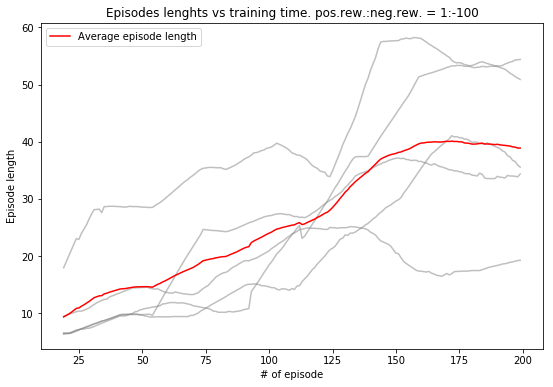

In [17]:
medium_rr_smoothed = plot_ep_lens(df_medium_rr_ep_ls, "pos.rew.:neg.rew. = 1:-100")
print_exec_time_summary(df_medium_rr_ep_ls, df_medium_rr_ex_ts)

Last episode performance: 60.28
Time per simulation step in each experiment: [0.11253065 0.11355688 0.11287655 0.11297864 0.11132499] s
Mean time per simulation step: 0.113 s, std: 0.001 s
Total execution time: 3927.198 s for 34898 steps -> 0.113 s per step


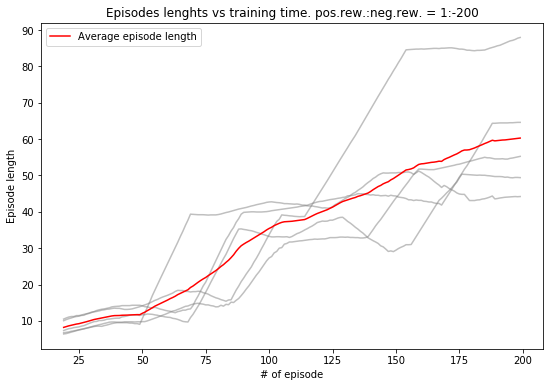

In [18]:
big_rr_smoothed = plot_ep_lens(df_big_rr_ep_ls, "pos.rew.:neg.rew. = 1:-200")
print_exec_time_summary(df_big_rr_ep_ls, df_big_rr_ex_ts)

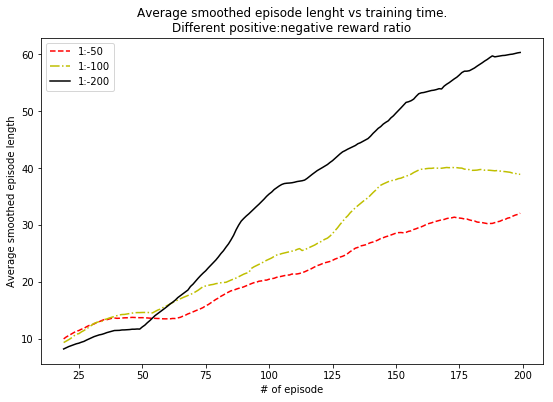

In [19]:
plt.plot(small_rr_smoothed, 'r--', label="1:-50")
plt.plot(medium_rr_smoothed, 'y-.', label="1:-100")
plt.plot(big_rr_smoothed, 'k', label="1:-200")
plt.title("Average smoothed episode lenght vs training time.\nDifferent positive:negative reward ratio")
plt.xlabel("# of episode")
plt.ylabel("Average smoothed episode length")
plt.legend();

## We observe that the biggest negative reward leads to the best results: episodes length is growing and final value is bigger than in other cases.
## On the contrary, with smaller negative reward one can observe slower training and even significant decrease in performance in particular experiment runs. This decreases are expected to be fixed with longer experiments, but this is not an optimal approach.
## The reason may be that smaller negative reward is penalizing bad decisions not strongly enough.

---------------------------------------

# 4. Various time-step experiment
To investigate system behaviour 5 different values for `time_step` were considered:
* 0.01 s - too small for real experiment with controlling cart-pole, just for investigation purposes.
* 0.05 s
* 0.1 s
* 0.5 s
* 1 s - too big, pole will be able to fall in one time step.

For each value 5 experiments with the following parameter were done:
* n_episodes = 200 - number of episodes to perform in each experiment run.
* force = 15 - magnitude to be applied during experiment at each time step.
* m_trolley = 10 - mass of a cart.
* m_load = 1 - mass of a pole.
* phi1_start = 85 degrees in rad - angle of the pole relative to positive X-axis direction at experiment start.
* w1_start = 0 - angle speed of the poles mass center.
* time_step = `time_step` s - time difference between simulation steps.
* positive_reward = 1 - positive reward for RL agent.
* negative_reward = -100 - negative reward for RL agent.

Episodes lengths of each training step of each experiment was saved, as well as real execution time for each experiment.

In [20]:
df_smallest_ts_ep_ls = pd.read_csv("./experiment_5_200_10_1_85_0_0.01_1_-100_15_episodes_lengths.csv", header=None)
df_smallest_ts_ex_ts = pd.read_csv("./experiment_5_200_10_1_85_0_0.01_1_-100_15_exec_times.csv", header=None)

df_small_ts_ep_ls = pd.read_csv("./experiment_5_200_10_1_85_0_0.05_1_-100_15_episodes_lengths.csv", header=None)
df_small_ts_ex_ts = pd.read_csv("./experiment_5_200_10_1_85_0_0.05_1_-100_15_exec_times.csv", header=None)

df_medium_ts_ep_ls = pd.read_csv("./experiment_5_200_10_1_85_0_0.1_1_-100_15_episodes_lengths.csv", header=None)
df_medium_ts_ex_ts = pd.read_csv("./experiment_5_200_10_1_85_0_0.1_1_-100_15_exec_times.csv", header=None)


df_big_ts_ep_ls = pd.read_csv("./experiment_5_200_10_1_85_0_0.5_1_-100_15_episodes_lengths.csv", header=None)
df_big_ts_ex_ts = pd.read_csv("./experiment_5_200_10_1_85_0_0.5_1_-100_15_exec_times.csv", header=None)

df_bigest_ts_ep_ls = pd.read_csv("./experiment_5_200_10_1_85_0_1_1_-100_15_episodes_lengths.csv", header=None)
df_bigest_ts_ex_ts = pd.read_csv("./experiment_5_200_10_1_85_0_1_1_-100_15_exec_times.csv", header=None)


### Let's take a look at each experiment.
### To smooth data we will use moving average with window size 20

Last episode performance: 142.35
Time per simulation step in each experiment: [0.10874363 0.11026723 0.10945423 0.10984911 0.11217201] s
Mean time per simulation step: 0.110 s, std: 0.001 s
Total execution time: 10125.980 s for 92094 steps -> 0.110 s per step


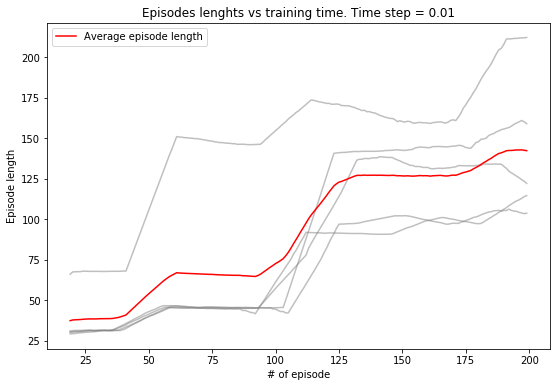

In [21]:
plot_ep_lens(df_smallest_ts_ep_ls, "Time step = 0.01")
print_exec_time_summary(df_smallest_ts_ep_ls, df_smallest_ts_ex_ts)

Last episode performance: 38.89
Time per simulation step in each experiment: [0.11558802 0.11338792 0.11081102 0.11179343 0.11232459] s
Mean time per simulation step: 0.113 s, std: 0.002 s
Total execution time: 2944.543 s for 26207 steps -> 0.112 s per step


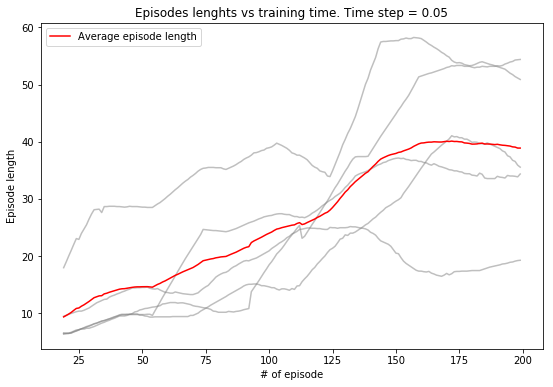

In [22]:
plot_ep_lens(df_small_ts_ep_ls, "Time step = 0.05")
print_exec_time_summary(df_small_ts_ep_ls, df_small_ts_ex_ts)

Last episode performance: 26.79
Time per simulation step in each experiment: [0.11617519 0.11987513 0.11608324 0.11539771 0.11673262] s
Mean time per simulation step: 0.117 s, std: 0.002 s
Total execution time: 1991.699 s for 17085 steps -> 0.117 s per step


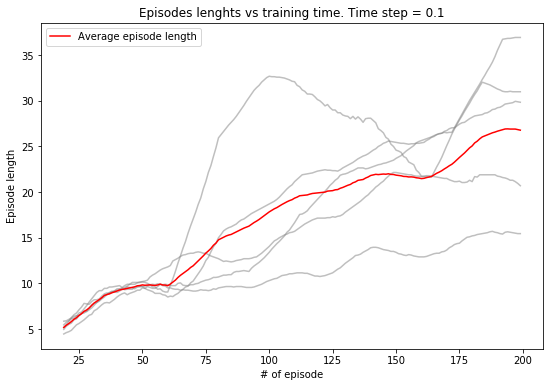

In [23]:
plot_ep_lens(df_medium_ts_ep_ls, "Time step = 0.1")
print_exec_time_summary(df_medium_ts_ep_ls, df_medium_ts_ex_ts)

Last episode performance: 4.00
Time per simulation step in each experiment: [0.13883931 0.14858235 0.14618718 0.14801817 0.14421257] s
Mean time per simulation step: 0.145 s, std: 0.004 s
Total execution time: 504.352 s for 3474 steps -> 0.145 s per step


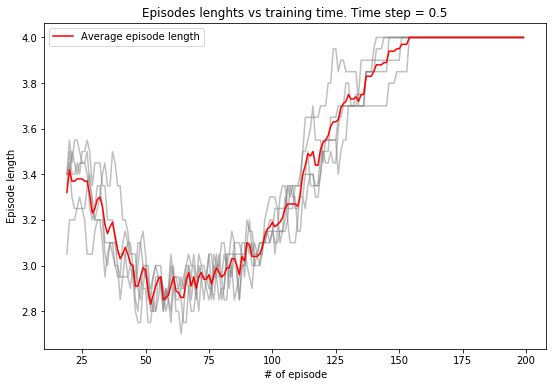

In [24]:
plot_ep_lens(df_big_ts_ep_ls, "Time step = 0.5")
print_exec_time_summary(df_big_ts_ep_ls, df_big_ts_ex_ts)

Last episode performance: 1.00
Time per simulation step in each experiment: [0.220791  0.222675  0.2145245 0.21421   0.215838 ] s
Mean time per simulation step: 0.218 s, std: 0.003 s
Total execution time: 217.608 s for 1000 steps -> 0.218 s per step


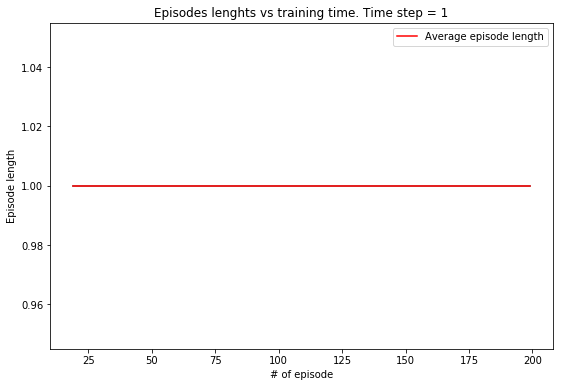

In [25]:
plot_ep_lens(df_bigest_ts_ep_ls, "Time step = 1")
print_exec_time_summary(df_bigest_ts_ep_ls, df_bigest_ts_ex_ts)

In [26]:
tss = [0.01, 0.05, 0.1, 0.5, 1]
last_perf = [142.35, 38.89, 26.79, 4, 1]
for i in range(len(tss)):
    print("For time step {} agent reached {:.2f}s of balancing pole".format(tss[i], tss[i] * last_perf[i]))

For time step 0.01 agent reached 1.42s of balancing pole
For time step 0.05 agent reached 1.94s of balancing pole
For time step 0.1 agent reached 2.68s of balancing pole
For time step 0.5 agent reached 2.00s of balancing pole
For time step 1 agent reached 1.00s of balancing pole


## We observe that with too small time step training is too slow, while for too big time step it is even inefficient. With time step equal 1 s agent is not able to perform more than 1 step, as 1 second is enough for pole to fall. With time step of 0.5 s agent can not overcome threshold of 4 steps, most likely because of the same reason.
## This is because big time steps are narrowing possibilities to control the system properly to achieve required goal. I.e. we are applying control action to the environment too seldom to reach the goal.
## However, simulation with bigger time steps is faster.
## So, there is a trade-off and proper time step should be found to guarantee fast and resultative training. In our case for the given parameters 0.1 s seems to be a good fit. It is reasonable from the point of view of both training and application.

--------------------------------

## BDP, policy update every 50 steps

In [12]:
df_bdp_ep_ls = pd.read_csv("./experiment_bdp_3_100_10_1_85_0_0.05_1_-100_15_0.95_50_1_1_episodes_lengths.csv", header=None)
df_bdp_ex_ts = pd.read_csv("./experiment_bdp_3_100_10_1_85_0_0.05_1_-100_15_0.95_50_1_1_exec_times.csv", header=None)

Last episode performance: 10.40
Time per simulation step in each experiment: [1.32097957 1.28613754 1.26456803] s
Mean time per simulation step: 1.291 s, std: 0.023 s
Total execution time: 3777.209 s for 2925 steps -> 1.291 s per step


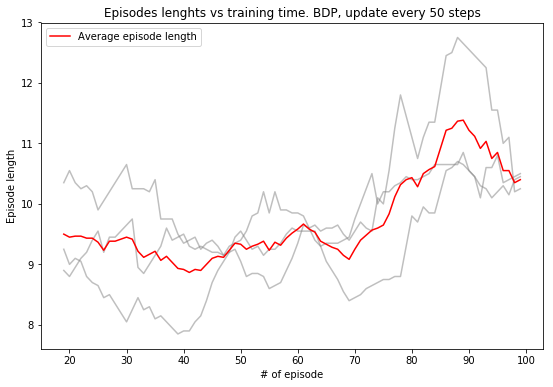

In [14]:
plot_ep_lens(df_bdp_ep_ls, "BDP, update every 50 steps", n_runs=3)
print_exec_time_summary(df_bdp_ep_ls, df_bdp_ex_ts)

In [7]:
df_bdp_dr0_ep_ls = pd.read_csv("./experiment_bdp_3_100_10_1_85_0_0.05_1_-100_15_0.95_50_1_0_episodes_lengths.csv", header=None)
df_bdp_dr0_ex_ts = pd.read_csv("./experiment_bdp_3_100_10_1_85_0_0.05_1_-100_15_0.95_50_1_0_exec_times.csv", header=None)

Last episode performance: 20.00
Time per simulation step in each experiment: [0.60093153 0.62008586 0.60218387] s
Mean time per simulation step: 0.608 s, std: 0.009 s
Total execution time: 3746.318 s for 6150 steps -> 0.609 s per step


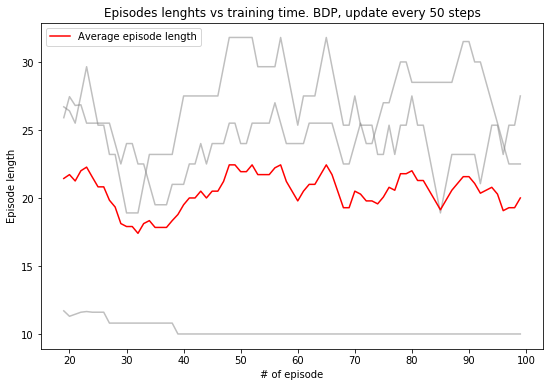

In [15]:
plot_ep_lens(df_bdp_dr0_ep_ls, "BDP, update every 50 steps", n_runs=3)
print_exec_time_summary(df_bdp_dr0_ep_ls, df_bdp_dr0_ex_ts)

In [9]:
df_bdp_dr2_ep_ls = pd.read_csv("./experiment_bdp_3_100_10_1_85_0_0.05_1_-100_15_0.95_50_1_2_episodes_lengths.csv", header=None)
df_bdp_dr2_ex_ts = pd.read_csv("./experiment_bdp_3_100_10_1_85_0_0.05_1_-100_15_0.95_50_1_2_exec_times.csv", header=None)

Last episode performance: 8.73
Time per simulation step in each experiment: [1.48482405 1.50494099 1.49664887] s
Mean time per simulation step: 1.495 s, std: 0.008 s
Total execution time: 4390.370 s for 2936 steps -> 1.495 s per step


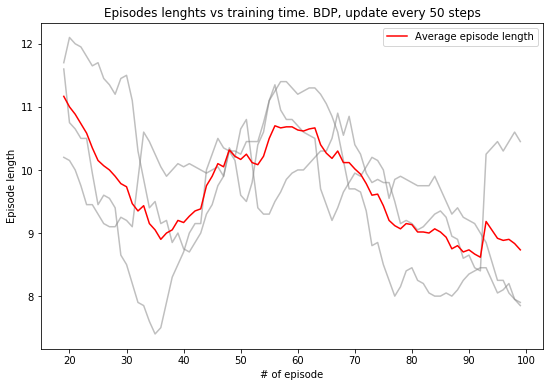

In [16]:
plot_ep_lens(df_bdp_dr2_ep_ls, "BDP, update every 50 steps", n_runs=3)
print_exec_time_summary(df_bdp_dr2_ep_ls, df_bdp_dr2_ex_ts)

## From the figures above, one can conclude, that such a simple Bayesian Dynamic Programming approach is not capable to solve the problem. Further steps may be: choice of more sophisticated prior or another state transition model.